In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def plot_multiple_pie_by_category(df, category, n_max=None, n_cols=3):
    if n_max is None:
        categories = df[category].unique()
    else:
        categories = df[category].value_counts().index.tolist()[:n_max]
    
    n_rows = len(categories)
    fig = make_subplots(rows=len(categories)//n_cols, cols=n_cols, specs=[[{"type": "pie"}]*n_cols]*(len(categories)//n_cols))
    for i, label in enumerate(categories):
        df_label = df[df[category] == label]
        fig.add_trace(go.Pie(labels=df_label["status_group"].unique(), 
        values=df_label["status_group"].value_counts(), 
        name=label, title=f"{label}: {len(df_label)} pumps"), row=i//n_cols+1, col=i%n_cols+1)
    fig.update_layout(height=max(300, n_rows*50), width=1400)
    fig.show()

In [3]:
df = pd.read_csv("pump_train.csv")

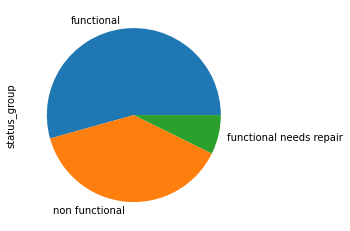

In [5]:
df["status_group"].value_counts().plot(kind="pie", y="status_group");

In [198]:
df

id  amount_tsh date_recorded                  funder  gps_height  \
0      12237        30.0    2013-01-23  Government Of Tanzania         107   
1      24566         0.0    2013-02-07      Private Individual           0   
2      20536         0.0    2011-07-15                  Sawaka           0   
3      30633       200.0    2011-03-25  Government Of Tanzania        2142   
4       2993         0.0    2011-02-17   African Muslim Agency         290   
...      ...         ...           ...                     ...         ...   
50485  15180      6000.0    2011-03-19                     Adb        1662   
50486  38288         0.0    2011-04-10             Safari Roya           0   
50487  50293      1000.0    2013-02-27                  Danida         932   
50488  29281         0.0    2013-03-04  Government Of Tanzania         -40   
50489  42522         0.0    2011-08-06        District Council           0   

              installer  longitude   latitude        wpt_name  num_private  \
0      District Council  39.360880 -10.295705  Zahanati Membe            0   
1                Edward  32.644074  -3.859265   Kwa Mama Wini            0   
2                   DWE  30.999792  -1.721771        Kwasimon            0   
3                 Commu  34.060324  -9.335288            none            0   
4      District Council  38.862874  -7.165410       Msikitini            0   
...                 ...        ...        ...             ...          ...   
50485               DWE  34.878490  -8.768993            none            0   
50486        Government  32.487175  -7.852078          Godown            0   
50487               DWE  35.317778 -10.761841    Kwa Mendradi            0   
50488               DWE  39.511674  -8.525186        Kwaboy 1            0   
50489  District Council  32.794647  -8.809516            Kese            0   

       ... water_quality quality_group      quantity  quantity_group  \
0      ...          soft          good        enough          enough   
1      ...          soft          good  insufficient    insufficient   
2      ...          soft          good        enough          enough   
3      ...          soft          good        enough          enough   
4      ...          soft          good           dry             dry   
...    ...           ...           ...           ...             ...   
50485  ...          soft          good        enough          enough   
50486  ...          soft          good        enough          enough   
50487  ...          soft          good        enough          enough   
50488  ...         salty         salty        enough          enough   
50489  ...          soft          good        enough          enough   

             source   source_type source_class              waterpoint_type  \
0             river    river/lake      surface  communal standpipe multiple   
1      shallow well  shallow well  groundwater                        other   
2      shallow well  shallow well  groundwater                        other   
3            spring        spring  groundwater           communal standpipe   
4       machine dbh      borehole  groundwater                    hand pump   
...             ...           ...          ...                          ...   
50485        spring        spring  groundwater           communal standpipe   
50486  shallow well  shallow well  groundwater                    hand pump   
50487         river    river/lake      surface           communal standpipe   
50488        spring        spring  groundwater  communal standpipe multiple   
50489        spring        spring  groundwater           communal standpipe   

      waterpoint_type_group    status_group  
0        communal standpipe      functional  
1                     other      functional  
2                     other  non functional  
3        communal standpipe      functional  
4                 hand pump  non functional  
...                     ...             ...  


In [199]:
px.histogram(df.groupby("status_group", as_index=False).mean(), x="gps_height", y="status_group")

In [200]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [201]:
df.public_meeting.mean()

0.909054655360591

In [240]:
print(f"{len(df.num_private[df.num_private!=0])/len(df):.2%} are private");

1.29% are private


In [233]:
plot_multiple_pie_by_category(df, "waterpoint_type", 6)

In [203]:
plot_multiple_pie_by_category(df, "ward", n_max=21)

In [204]:
plot_multiple_pie_by_category(df, "installer", n_max=21)

## Funder

In [205]:
plot_multiple_pie_by_category(df, "funder", n_max=21)

In [206]:
c = df.funder.value_counts()
c[c>100].sum()

35710

In [207]:
df.amount_tsh.describe()

count     50490.000000
mean        319.158123
std        2987.517185
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [208]:
plot_multiple_pie_by_category(df, "payment_type", n_max=6)

In [209]:
plot_multiple_pie_by_category(df, "management")

In [210]:
plot_multiple_pie_by_category(df, "extraction_type")

In [211]:
plot_multiple_pie_by_category(df, "construction_year", n_max=21)

In [212]:
plot_multiple_pie_by_category(df, "quality_group")

In [227]:
plot_multiple_pie_by_category(df, "source", n_max=9)

In [222]:
plot_multiple_pie_by_category(df, "quantity", n_max=3)

In [214]:
plot_multiple_pie_by_category(df, "permit")

In [215]:
plot_multiple_pie_by_category(df, "scheme_name", n_max=21)

In [216]:
plot_multiple_pie_by_category(df, "public_meeting", n_max=None)

In [217]:
px.box(df, x="population", y="status_group")

In [218]:
px.box(df, x="amount_tsh", y="status_group")

# Region

Analysed columns: gps_height, longitude, latitude, subvillage, region, region_code, district_code

In [5]:
px.scatter_geo(df.sample(1_000), lat="latitude", lon="longitude", color="status_group", scope="africa", opacity=0.7)

All pumps are located within tansania (One outlier comming from a letter in the latitude?)

In [6]:
df[["region_code", "region"]].sample(10) 
# goes to show that region_code is an encoding of the region

region_code   region
37676           20     Mara
27375            4    Tanga
22797           90   Mtwara
37356           11   Iringa
31833           10   Ruvuma
29297           11   Iringa
22326           18   Kagera
8542            20     Mara
106             16   Kigoma
45466           13  Singida

In [219]:
plot_multiple_pie_by_category(df, "region")

In [55]:
px.bar(df.groupby("region", as_index=False).count().sort_values("id", ascending=False), x="region", y="id")